In [8]:
# Import the required modules
%matplotlib notebook
%pylab inline 
import cv2
import os
from IPython.display import clear_output
import datetime
# import pickle as cPickle
# import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl
from IPython import display 

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gray', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
trainingSet = 'TrainingSet'
employees = 'Employees'
rascals = 'Rascals'

In [10]:
scaleFactor = 1.2
minNeighbors = 5
faceWidth = 100
faceHeight = 100

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

0009011138


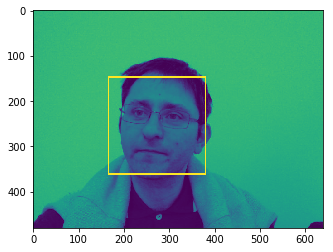

In [ ]:
# read id from reader
for i in range(0,100):
    # reading input from card reader
    cardId = input()
    # need to test
    cap = cv2.VideoCapture(-1)
    # stripping first zeroes (to proper id)
    cardId = str(int(cardId))
    # reading time
    currentTime = datetime.datetime.now()
    strTime = currentTime.strftime("%d.%m.%Y-%H:%M:%S")
    # Defined path to folder
    empPath = os.path.join(trainingSet, employees, cardId)    
    if not os.path.exists(empPath):
        os.makedirs(empPath)
    # Reading single frame
    # ret, frame = cap.grab()
    retr = cap.grab()
    ret, frame = cap.retrieve(retr)
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detecting faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
    for (x,y,w,h) in faces:
        if ( w >= faceWidth and h >= faceHeight ):
            cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            crop = frame[y:(y+w),x:(x+h)]
            res = cv2.resize(crop,dsize=(faceWidth,faceHeight), interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(os.path.join(empPath, '%s.jpg' %strTime), res)
            # TODO remove displayment            
            imshow(gray)
            show()
    cap.release()
    # Display the frame until new frame is available
    clear_output(wait=True)    
    if cardId == 'quit':
        break

In [ ]:
baseDir = os.path.join(trainingSet,employees)
files = os.listdir(baseDir)

# files.sort()
# print(files)
trainingX = []
trainingY = []
# print(trainingY)
training = []

for folder in os.listdir(baseDir):
#     print(folder)
    idx = files.index(folder)
    personPath = os.path.join(baseDir, folder)
    for personImage in os.listdir(personPath):
#         print(personImage)
        img = os.path.join(personPath, personImage)
        nm = cv2.imread(img)
        nm = cv2.cvtColor(nm, cv2.COLOR_BGR2GRAY)
        nm = (nm - nm.mean())/(nm.std() + 1e-8)
#         imshow(nm)
#         show()
        imgB = np.asarray(nm).reshape(-1)
#         print(shape(imgB))
        trainingX.append(imgB)  
        y = np.zeros(len(files))
        y[idx] = 1
        trainingY.append(y)

training.append(trainingX)
training.append(trainingY)

In [ ]:
Xdisplay = np.reshape(training[0][0],(faceHeight,faceHeight))
imshow(Xdisplay)
show()